<a href="https://colab.research.google.com/github/vmjs1234/CLUSTERING_ASSIGNMENT/blob/main/e_)_Anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install pyod scikit-learn matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=8a7e18122532844830e1f3661d8516fa81a261c5bf02a2697969a5d7cd8cf7b5
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [2]:

# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from pyod.models.knn import KNN  # k-Nearest Neighbors detector
import matplotlib.pyplot as plt


In [3]:

# Step 1: Generate synthetic univariate data
# Create a dataset with clusters and add anomalies
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.5, random_state=42)
outliers = np.random.uniform(low=-6, high=6, size=(20, 2))  # Add some outliers
X = np.vstack([X, outliers])


In [4]:

# Step 2: Standardize the data for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:

# Step 3: Initialize and train the PyOD KNN model
knn = KNN(contamination=0.1)  # Assume 10% of the data are anomalies
knn.fit(X_scaled)


KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [6]:

# Step 4: Predict anomalies
labels = knn.labels_  # Binary labels (0: normal, 1: anomaly)
scores = knn.decision_scores_  # Raw anomaly scores


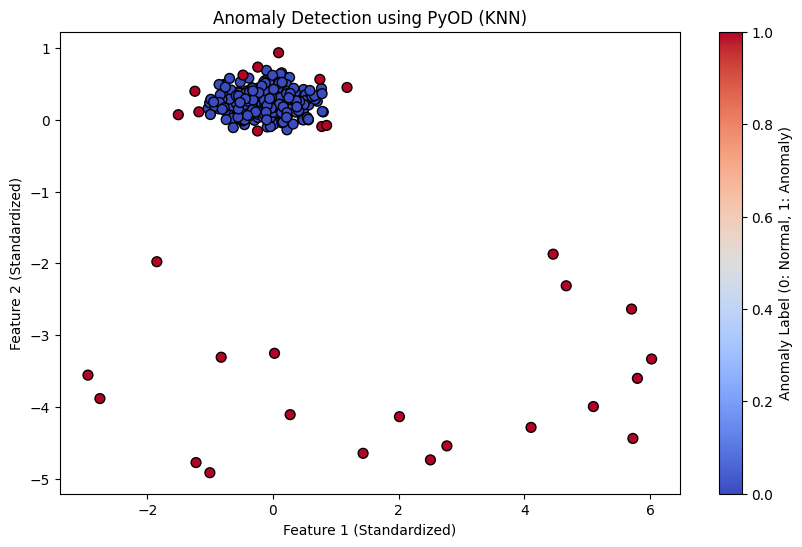

In [7]:

# Step 5: Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='coolwarm', edgecolor='k', s=50)
plt.title("Anomaly Detection using PyOD (KNN)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.colorbar(label="Anomaly Label (0: Normal, 1: Anomaly)")
plt.show()

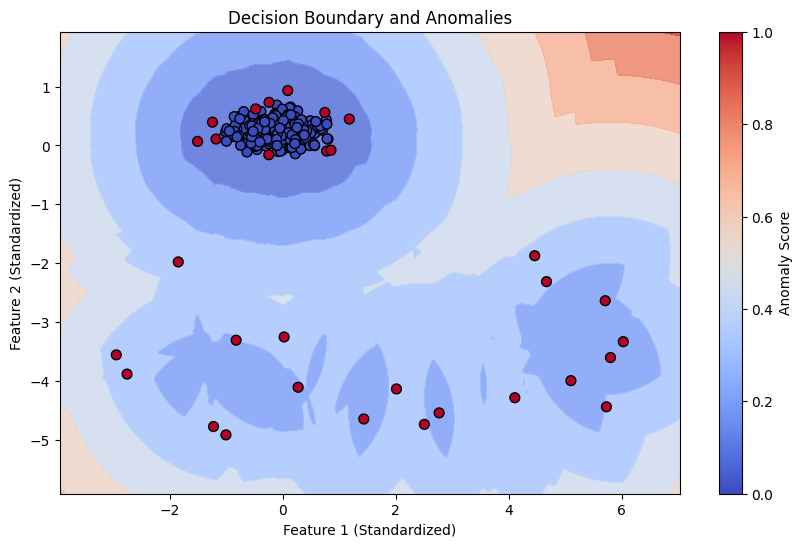

In [10]:


## Decision Boundary Visualization (if applicable)
from matplotlib.colors import ListedColormap

# Create a grid for visualization of decision boundaries
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 200),
                     np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]
decision_scores = knn.decision_function(grid_points).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, decision_scores, cmap='coolwarm', alpha=0.8)  # Decision scores as background
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='coolwarm', edgecolor='k', s=50)
plt.title("Decision Boundary and Anomalies")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.colorbar(label="Anomaly Score")
plt.show()




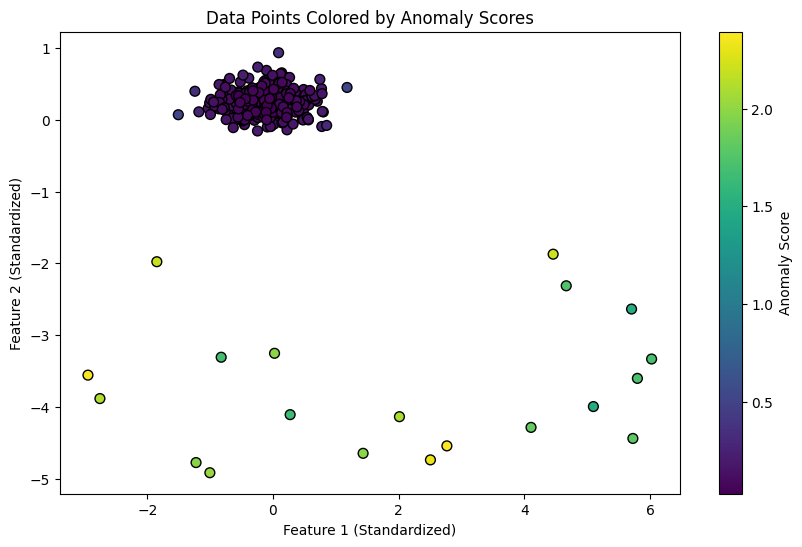

In [11]:

## Scatter Plot with Color Gradient Based on Scores
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=scores, cmap='viridis', edgecolor='k', s=50)
plt.title("Data Points Colored by Anomaly Scores")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
cbar = plt.colorbar(scatter)
cbar.set_label("Anomaly Score")
plt.show()